### Rishabh Tiwari (RT27739)  |  Sreekar Lanka (SL54387)

<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 2

Total points: 70

Due: Friday, September 23 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Bias and Variance (10 pts)

(a). (4 pts) Describe the difference between model bias and the bias of a point estimator. 

(b) (6 pts). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine if the model is underfitting?

# Answer : 
(a) Model Bias is a systematic error from an assumption in the machine learning algorithm’s modeling. The algorithm tends to systematically learn the wrong signals by not considering all the information contained within the data. Model bias may lead an algorithm to miss the relevant relationship between data inputs (features) and targeted outputs (predictions) where as bias of a point estimator is the difference between the expected value of the estimator and the value of parameter being estimated. 
 
 (b) Overfitting: 
To deteremine whether the model is overfitting using learning curve we will need both test and training error curves. For a given data the training error goes down over time achieving low error values but the test error goes down until a turning point is found and there it starts going up again. That point where the test error curve starts going up again represents the beginning of overfitting. 

  Underfitting: 
The error curve is high and does not decrease with increase in number of iterations for both training and test curves then the model is said to be underfitting. We could actually use just the training curve and check the error is high and it does not decrease, to see that it is underfitting

# Question 2: Bias-Variance Exploration (20 pts)
We want to build a model that can predict y for unknown inputs x.

(a) (10 pts) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. Tips: you can use np.vander(np.squeeze(x_train), deg+1) to generate the deg-degree polynomial vector of x_train. For example, np.vander(np.squeeze(x_train), 3) gives you the second-degree polynomial of x_train.

(b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (5 pts) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them. You can use the following codes to load the dataset and complete the analysis:

In [4]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
data_load = np.load('./data.npy', allow_pickle = True)

In [7]:
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test = data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

In [8]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

  # YOUR CODE COMES HERE
    
    #preparing data for polynomial regression - converting single dimenision data to powered form and multi dimensional
    x_train_7th_deg = np.vander(np.squeeze(x_train),8)
    x_train_4th_deg = np.vander(np.squeeze(x_train),5)
    x_train_2nd_deg = np.vander(np.squeeze(x_train),3)
    
    x_test_2nd_deg = np.vander(np.squeeze(x_test),3)
    x_test_4th_deg = np.vander(np.squeeze(x_test),5)
    x_test_7th_deg = np.vander(np.squeeze(x_test),8)
    
    x_all_2nd_deg = np.vander(np.squeeze(x_all),3)
    x_all_4th_deg = np.vander(np.squeeze(x_all),5)
    x_all_7th_deg = np.vander(np.squeeze(x_all),8)
    
    #fitting 2nd degree polynomial equation 
    lin_mod_deg2 = LinearRegression()
    lin_mod_deg2.fit(x_train_2nd_deg,y_train)
    y_pred_test_deg_2 = lin_mod_deg2.predict(x_test_2nd_deg) #predicting on test data
    y_pred_x_all_deg_2 = lin_mod_deg2.predict(x_all_2nd_deg) #predicting on x_all
    
    MSE_test_deg2 = mean_squared_error(y_test, y_pred_test_deg_2)
    print('The test MSE for 2nd degree polynomial LR is:',MSE_test_deg2)
    MSE_train_deg2 = mean_squared_error(y_train,lin_mod_deg2.predict(x_train_2nd_deg))
    print('The train MSE for 2nd degree polynomial LR is:', MSE_train_deg2)
    
    #fitting 4th degree polynomial equation
    lin_mod_deg4 = LinearRegression()
    lin_mod_deg4.fit(x_train_4th_deg,y_train)
    y_pred_test_deg_4 = lin_mod_deg4.predict(x_test_4th_deg) #predicting on test data
    y_pred_x_all_deg_4 = lin_mod_deg4.predict(x_all_4th_deg) # predicting on x_all
    
    MSE_test_deg4 = mean_squared_error(y_test, y_pred_test_deg_4)
    print('The test MSE for 4th degree polynomial LR is:',MSE_test_deg4)
    MSE_train_deg4 = mean_squared_error(y_train, lin_mod_deg4.predict(x_train_4th_deg))
    print('The train MSE for 4th degree polynomial LR is:',MSE_train_deg4)
    
    #fitting 7th degree polynomial equation
    lin_mod_deg7 = LinearRegression()
    lin_mod_deg7.fit(x_train_7th_deg,y_train)
    y_pred_test_deg_7 = lin_mod_deg7.predict(x_test_7th_deg) #predicting on test data
    y_pred_x_all_deg_7 = lin_mod_deg7.predict(x_all_7th_deg) #predicting on x_all
    
    MSE_test_deg7 = mean_squared_error(y_test, y_pred_test_deg_7)
    print('The test MSE for 7th degree polynomial LR is:',MSE_test_deg7)
    MSE_train_deg7 = mean_squared_error(y_train, lin_mod_deg7.predict(x_train_7th_deg))
    print('The train MSE for 7th degree polynomial LR is:',MSE_train_deg7)

    #Plotting all graphs
    fig,ax = plt.subplots(3,3, figsize = (15,15))
    #fig.figure(figsize = 10)
    
    ax[0,0].scatter(x_train, y_train)
    ax[0,0].set_title('X_train vs Y_train')
    
    ax[0,1].scatter(x_test, y_test)
    ax[0,1].set_title('X_test vs Y_test')
    
    ax[1,0].scatter(x_all,y_pred_x_all_deg_2)
    ax[0,1].set_title('Prediction on X_all (N = 2)')
    
    ax[1,1].scatter(x_all,y_pred_x_all_deg_4)
    ax[1,1].set_title('Prediction on X_all (N = 4)')
    
    ax[1,2].scatter(x_all,y_pred_x_all_deg_7)
    ax[1,2].set_title('Prediction on X_all (N = 7)')
    
    ax[2,0].scatter(x_test,y_pred_test_deg_2)
    ax[2,0].set_title('Prediction on X_test (N = 2)')
    
    ax[2,1].scatter(x_test,y_pred_test_deg_4)
    ax[2,1].set_title('Prediction on X_test (N = 4)')
    
    ax[2,2].scatter(x_test,y_pred_test_deg_7)
    ax[2,2].set_title('Prediction on X_test (N = 7)')
    
    
    return [MSE_train_deg2, MSE_train_deg4, MSE_train_deg7], [MSE_test_deg2, MSE_test_deg4,MSE_test_deg7]
        
  #print("IMPLEMENT ME!")

The test MSE for 2nd degree polynomial LR is: 320.06408346977855
The train MSE for 2nd degree polynomial LR is: 247.29679797371534
The test MSE for 4th degree polynomial LR is: 31.29208288660674
The train MSE for 4th degree polynomial LR is: 31.72001805729006
The test MSE for 7th degree polynomial LR is: 33.410694077690025
The train MSE for 7th degree polynomial LR is: 30.67719359210973


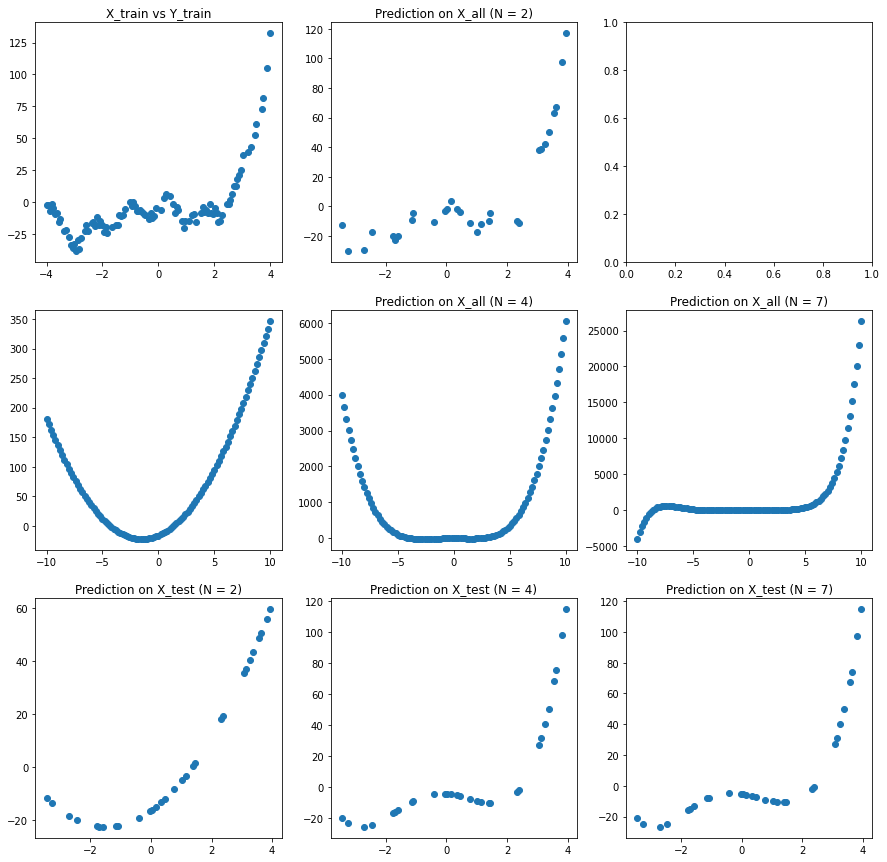

In [9]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

### Part B
Comparing the 3 models, the model with the 4th degree polynomial fits the data the best. This is evident from the test MSE scores as well (lowest for the model with 4th degree polynomial). 

As we are increasing the degree of the polynomial, we are increasing the complexity of the model. As the complexity increases the bias decreases and the variance goes up. The model with the second degree polynomial has very high bias and low variance, whereas the model with the seventh degree polynomial has low bias and high variance (evident from the train and test MSE scores).

### Part C

20% data 

The test MSE for 2nd degree polynomial LR is: 402.32312690992865
The train MSE for 2nd degree polynomial LR is: 161.17147378830037
The test MSE for 4th degree polynomial LR is: 38.3407449834428
The train MSE for 4th degree polynomial LR is: 35.1151131391298
The test MSE for 7th degree polynomial LR is: 135.20764526756463
The train MSE for 7th degree polynomial LR is: 22.543946691373332

 40% data 

The test MSE for 2nd degree polynomial LR is: 405.80516696165745
The train MSE for 2nd degree polynomial LR is: 150.332512860857
The test MSE for 4th degree polynomial LR is: 33.164282959187425
The train MSE for 4th degree polynomial LR is: 31.62452964644691
The test MSE for 7th degree polynomial LR is: 61.23741884551077
The train MSE for 7th degree polynomial LR is: 25.492718751653616

 60% data 

The test MSE for 2nd degree polynomial LR is: 403.2513784833407
The train MSE for 2nd degree polynomial LR is: 150.08383759141728
The test MSE for 4th degree polynomial LR is: 31.781415

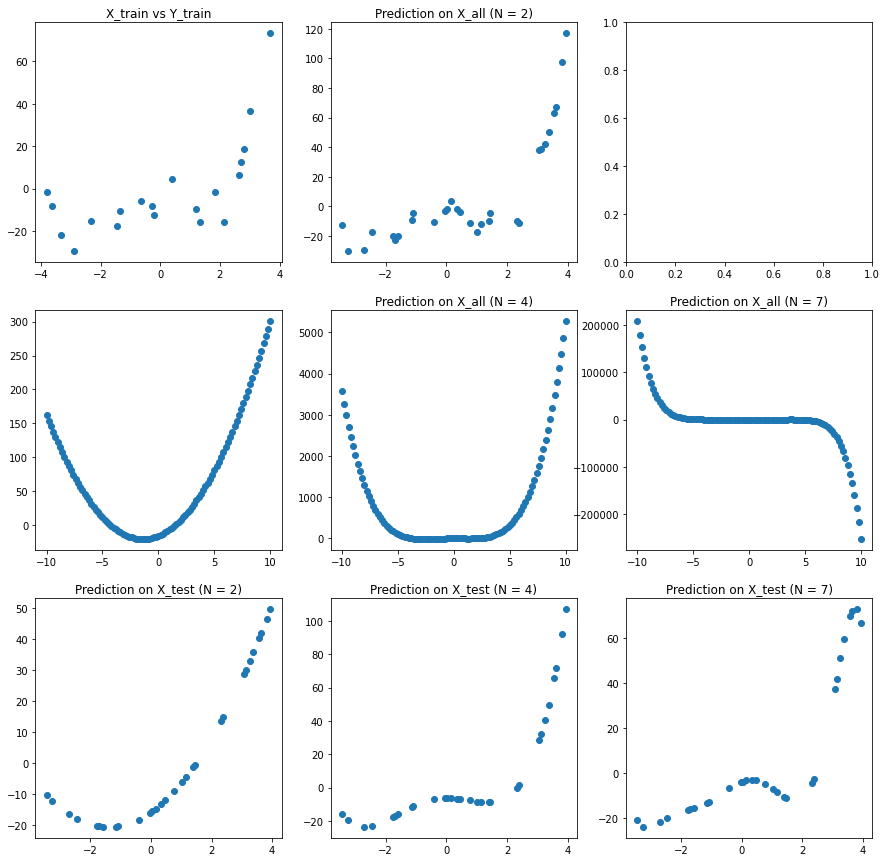

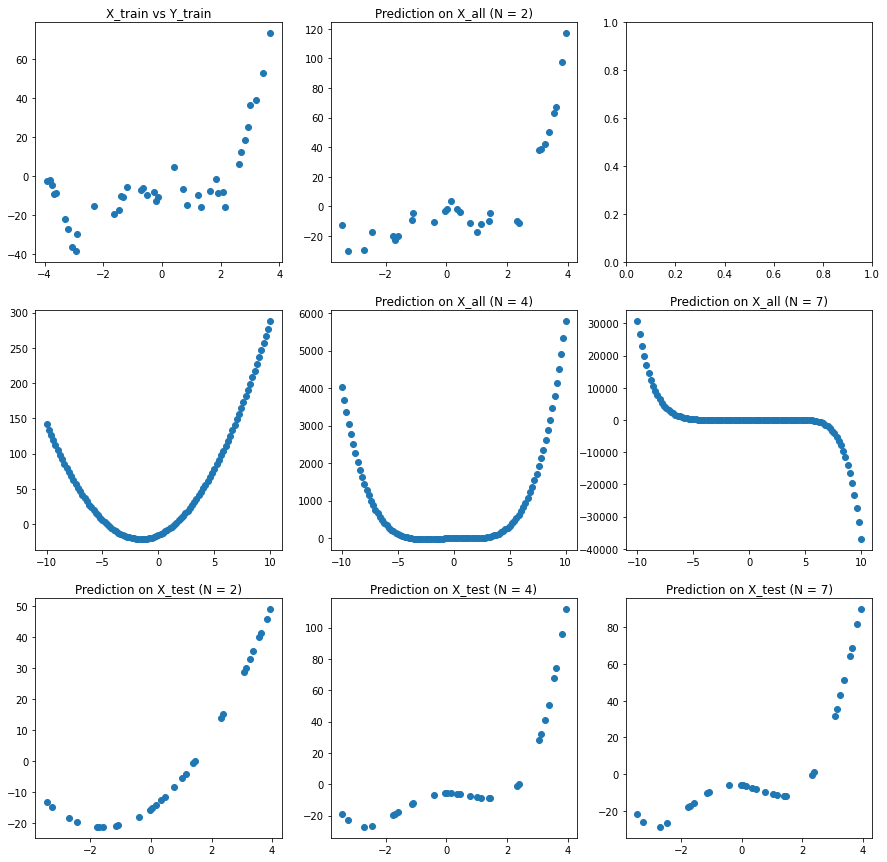

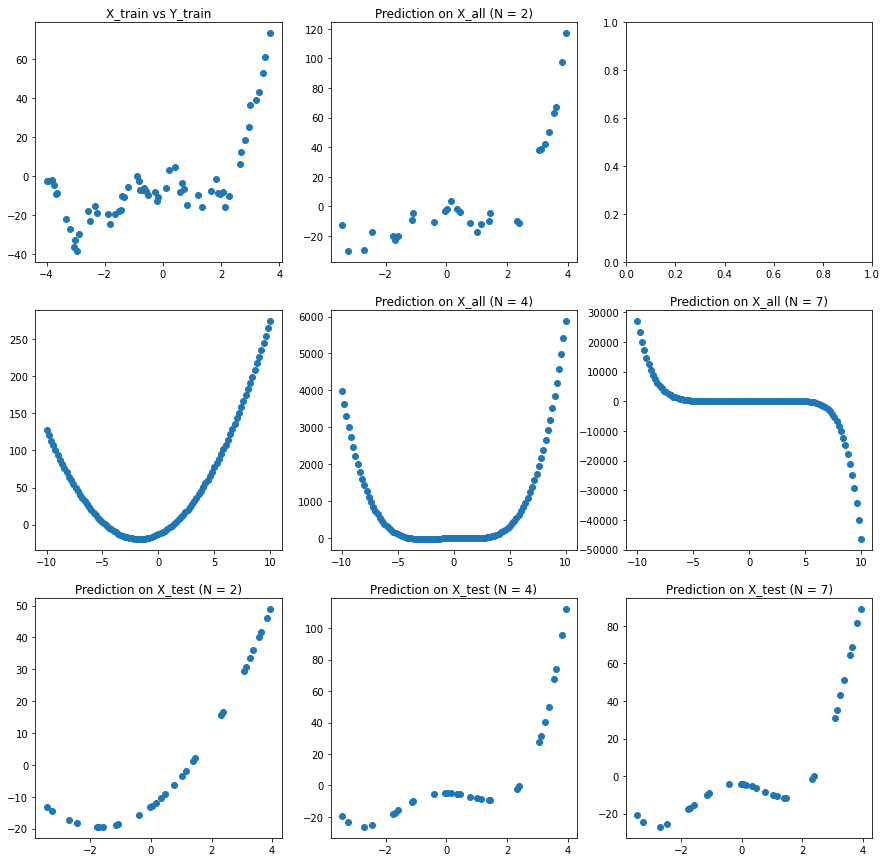

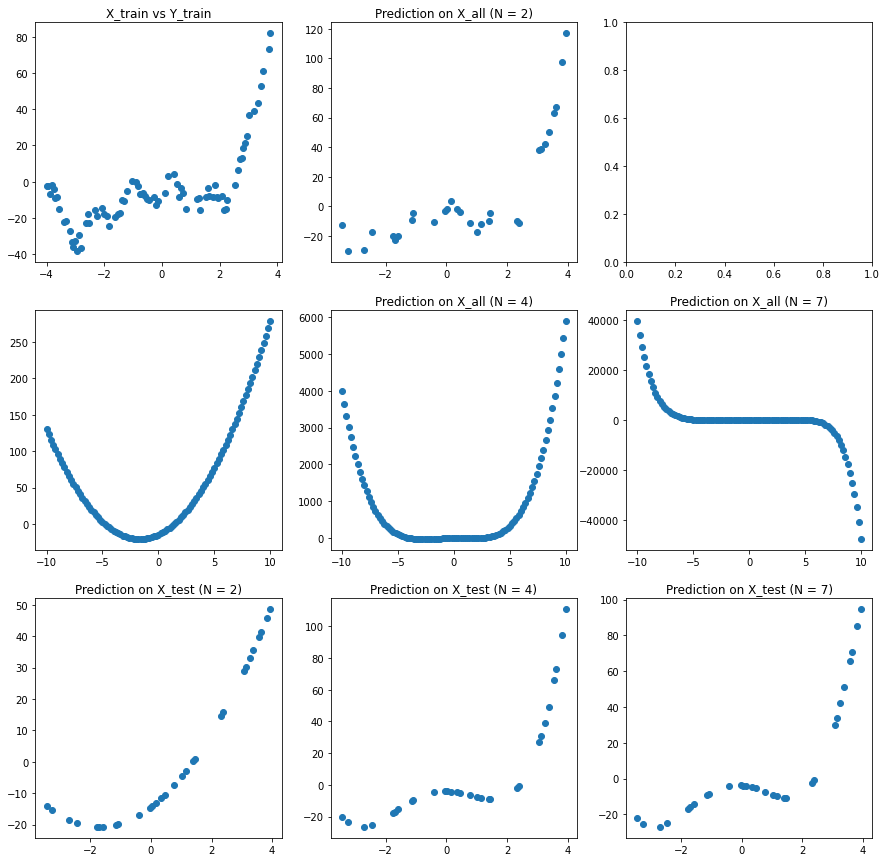

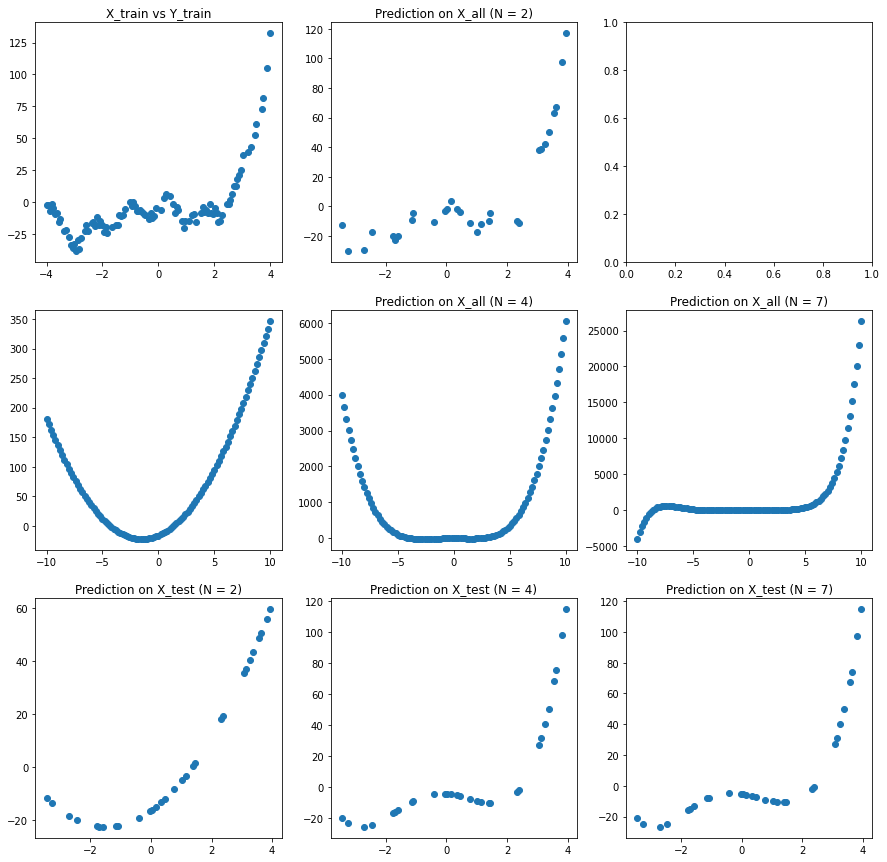

In [10]:
# Study the effects of the training data size on the bias and variance
print("20% data \n")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("\n 40% data \n")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("\n 60% data \n")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("\n 80% data \n")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("\n 100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

[Text(0.5, 0, 'training set size'),
 Text(0, 0.5, 'log(MSE)'),
 Text(0.5, 1.0, '7th Degree polynomial')]

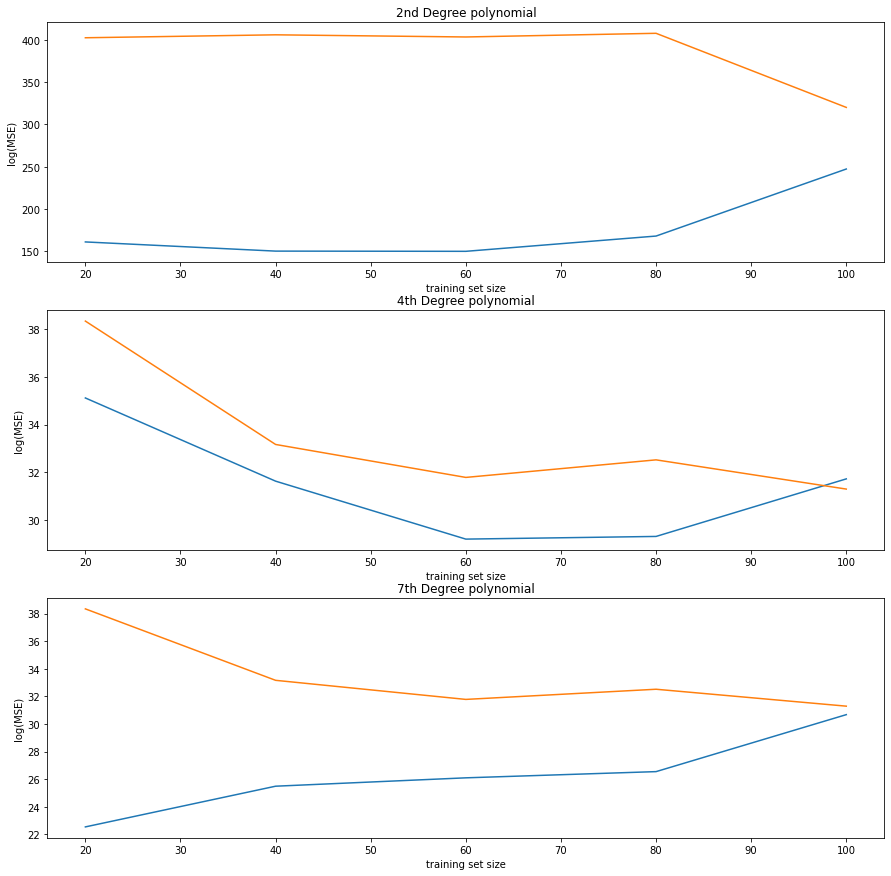

In [122]:
import math 
dataset_size = [20,40,60,80,100]

mse_train_log_2nd_deg = []
mse_test_log_2nd_deg = []

mse_train_log_4th_deg = []
mse_test_log_4th_deg = []

mse_train_log_7th_deg = []
mse_test_log_7th_deg = []

for i in [train_rmses_20,train_rmses_40, train_rmses_60, train_rmses_80, train_rmses_100]:
    mse_train_log_2nd_deg.append(i[0]) 

for j in [train_rmses_20,train_rmses_40, train_rmses_60, train_rmses_80, train_rmses_100]:
    mse_train_log_4th_deg.append(j[1])
    
for k in [train_rmses_20,train_rmses_40, train_rmses_60, train_rmses_80, train_rmses_100]:
    mse_train_log_7th_deg.append(k[2])

for a in [test_rmses_20, test_rmses_40, test_rmses_60, test_rmses_80, test_rmses_100]:
    mse_test_log_2nd_deg.append(a[0])
    
for b in [test_rmses_20, test_rmses_40, test_rmses_60, test_rmses_80, test_rmses_100]:
    mse_test_log_4th_deg.append(b[1])

for c in [test_rmses_20, test_rmses_40, test_rmses_60, test_rmses_80, test_rmses_100]:
    mse_test_log_7th_deg.append(c[2])
    
fig,ax = plt.subplots(3,1, figsize = (15,15))
 
ax[0].plot(dataset_size,mse_train_log_2nd_deg)
ax[0].plot(dataset_size,mse_test_log_2nd_deg)
ax[0].set(xlabel='training set size', ylabel='log(MSE)',title = '2nd Degree polynomial')

ax[1].plot(dataset_size,mse_train_log_4th_deg)
ax[1].plot(dataset_size,mse_test_log_4th_deg)
ax[1].set(xlabel='training set size', ylabel='log(MSE)')
ax[1].set(xlabel='training set size', ylabel='log(MSE)',title = '4th Degree polynomial')

ax[2].plot(dataset_size,mse_train_log_7th_deg)
ax[2].plot(dataset_size,mse_test_log_4th_deg)
ax[2].set(xlabel='training set size', ylabel='log(MSE)')
ax[2].set(xlabel='training set size', ylabel='log(MSE)',title = '7th Degree polynomial')

In the plots above we can see that as we increase the training data size the variance decreases, i.e the difference between the test MSE and train MSE reduces. 
This is because when we train our model on more data, it's essentially learning the patterns and not the noise. Hence, it performs better on test datset as well. 

The MSE range(test and train) is highest for the model with the 2nd degree polynomial (complexity is low - therefore variance is high). 

# Question 3: Stochastic Gradient Descent Improvements (10 pts)

1. (5 pts) Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function. 

2. (5 pts) Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent. 


# Answer : 
1. Momentum helps in two ways in reaching to a faster convergence of the loss function:
- It gives the direction to gradients in which the global minima can be reached at the earliest by cancelling the vectors in the opposite direction.

- It uses the concept of exponential smoothening where the importance is given to the most recent value of the gradient. Here the value of the most recent gradient depends on the previous gradients. It is multiplied by a beta which acts as smoothening factor which adds weightage to the most recent gradients.


2. Mini batch stochastic gradient descent is where we consider a small batch of randomly selected samples from a collection of datapoints and these batches are used to calculate the model error and update weights.The advantages of using mini batch SGD is - we do not need to load the entire datapoints(say million records) and as we are using  batches it helps in increasing the update freqency of the model, frequency of execution, saves the memory as entire data is not loaded and does not require high computational power.

# Question 4: Stochastic Gradient Descent (30 pts)

1.(**10 pts**) Stochastic gradient descent derivation<br>

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$ 


2.(**20 pts**) Stochastic gradient descent coding <br>

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [24]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [75]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        #self.coef # = please put your codes here to update the self.coef using SGD
        self.coef = self.coef - (self.learning_rate * gradient)
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                y_pred = self.linearPredict(X[i])
#                 print('ypred:', y_pred)
                error = y[i] - y_pred
#                 print('error:', error)
#                 print('self.coef',self.coef)
#                 print('X[i]',X[i])

                # Compute gradients
                gradient = (-2 * error * X[i]) +  (2 * self.regularization * self.coef)
                #print('gradient',gradient)
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            #print('coefs',coefs)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
            #print(residuals)

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
          
        return self.lowest_mse

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X    
        return np.dot(X,self.coef.T)

In [115]:
regression_obj = Regression(learning_rate[1], regularization[1], 3)
lowest_mse = regression_obj.fit(X, y, 'sgd', False)

In [116]:
mse_list = []
regu_list = []
learning_rate_list = []
for i in learning_rate:
    for j in regularization:
        regression_obj = Regression(i, j, n_epochs)
        lowest_mse = regression_obj.fit(X, y, 'sgd', False)
        mse_list.append(lowest_mse)
        learning_rate_list.append(i)
        regu_list.append(j)

/var/folders/qy/r2hbqn1n1_5dw_z52vsv_t5h0000gn/T/ipykernel_769/1546731444.py:44: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
/var/folders/qy/r2hbqn1n1_5dw_z52vsv_t5h0000gn/T/ipykernel_769/1546731444.py:35: RuntimeWarning: overflow encountered in add
  gradient = (-2 * error * X[i]) +  (2 * self.regularization * self.coef)
/var/folders/qy/r2hbqn1n1_5dw_z52vsv_t5h0000gn/T/ipykernel_769/1546731444.py:18: RuntimeWarning: invalid value encountered in subtract
  self.coef = self.coef - (self.learning_rate * gradient)
/var/folders/qy/r2hbqn1n1_5dw_z52vsv_t5h0000gn/T/ipykernel_769/1546731444.py:35: RuntimeWarning: overflow encountered in multiply
  gradient = (-2 * error * X[i]) +  (2 * self.regularization * self.coef)
/var/folders/qy/r2hbqn1n1_5dw_z52vsv_t5h0000gn/T/ipykernel_769/1546731444.py:35: RuntimeWarning: invalid value encountered in multiply
  gradient = (-2 * error * X[i]) +  (2 * self.regularization * self.coef)
/var/folders/qy/r2hbqn1n1_5dw_z

In [117]:
mse_lr_regu_dict = {'mse' : mse_list , 'lr' : learning_rate_list, 'regu' : regu_list}
mse_lr_regu_df = pd.DataFrame(mse_lr_regu_dict).sort_values(by = ['mse'])

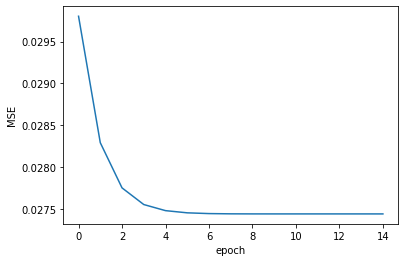

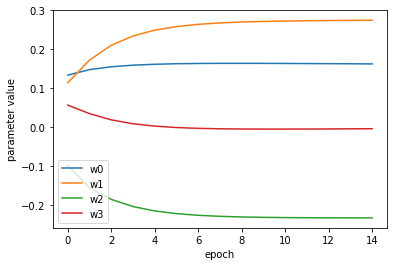

In [118]:
#min_mse_index = mse_list.index(min(mse_list)
regression_obj = Regression(mse_lr_regu_df['lr'][6], mse_lr_regu_df['regu'][6] , n_epochs)
lowest_mse = regression_obj.fit(X, y, 'sgd', True)

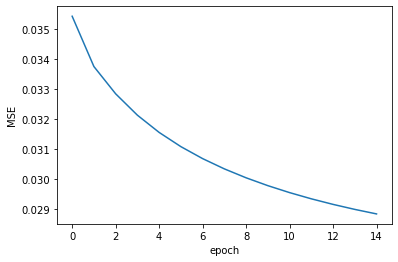

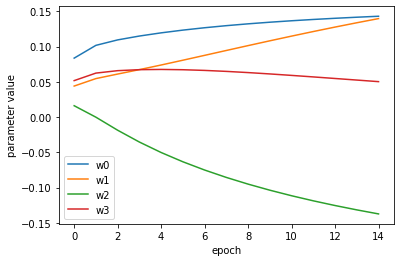

In [119]:
regression_obj = Regression(mse_lr_regu_df['lr'][3], mse_lr_regu_df['regu'][3] , n_epochs)
lowest_mse = regression_obj.fit(X, y, 'sgd', True)

## Q4) Part 1

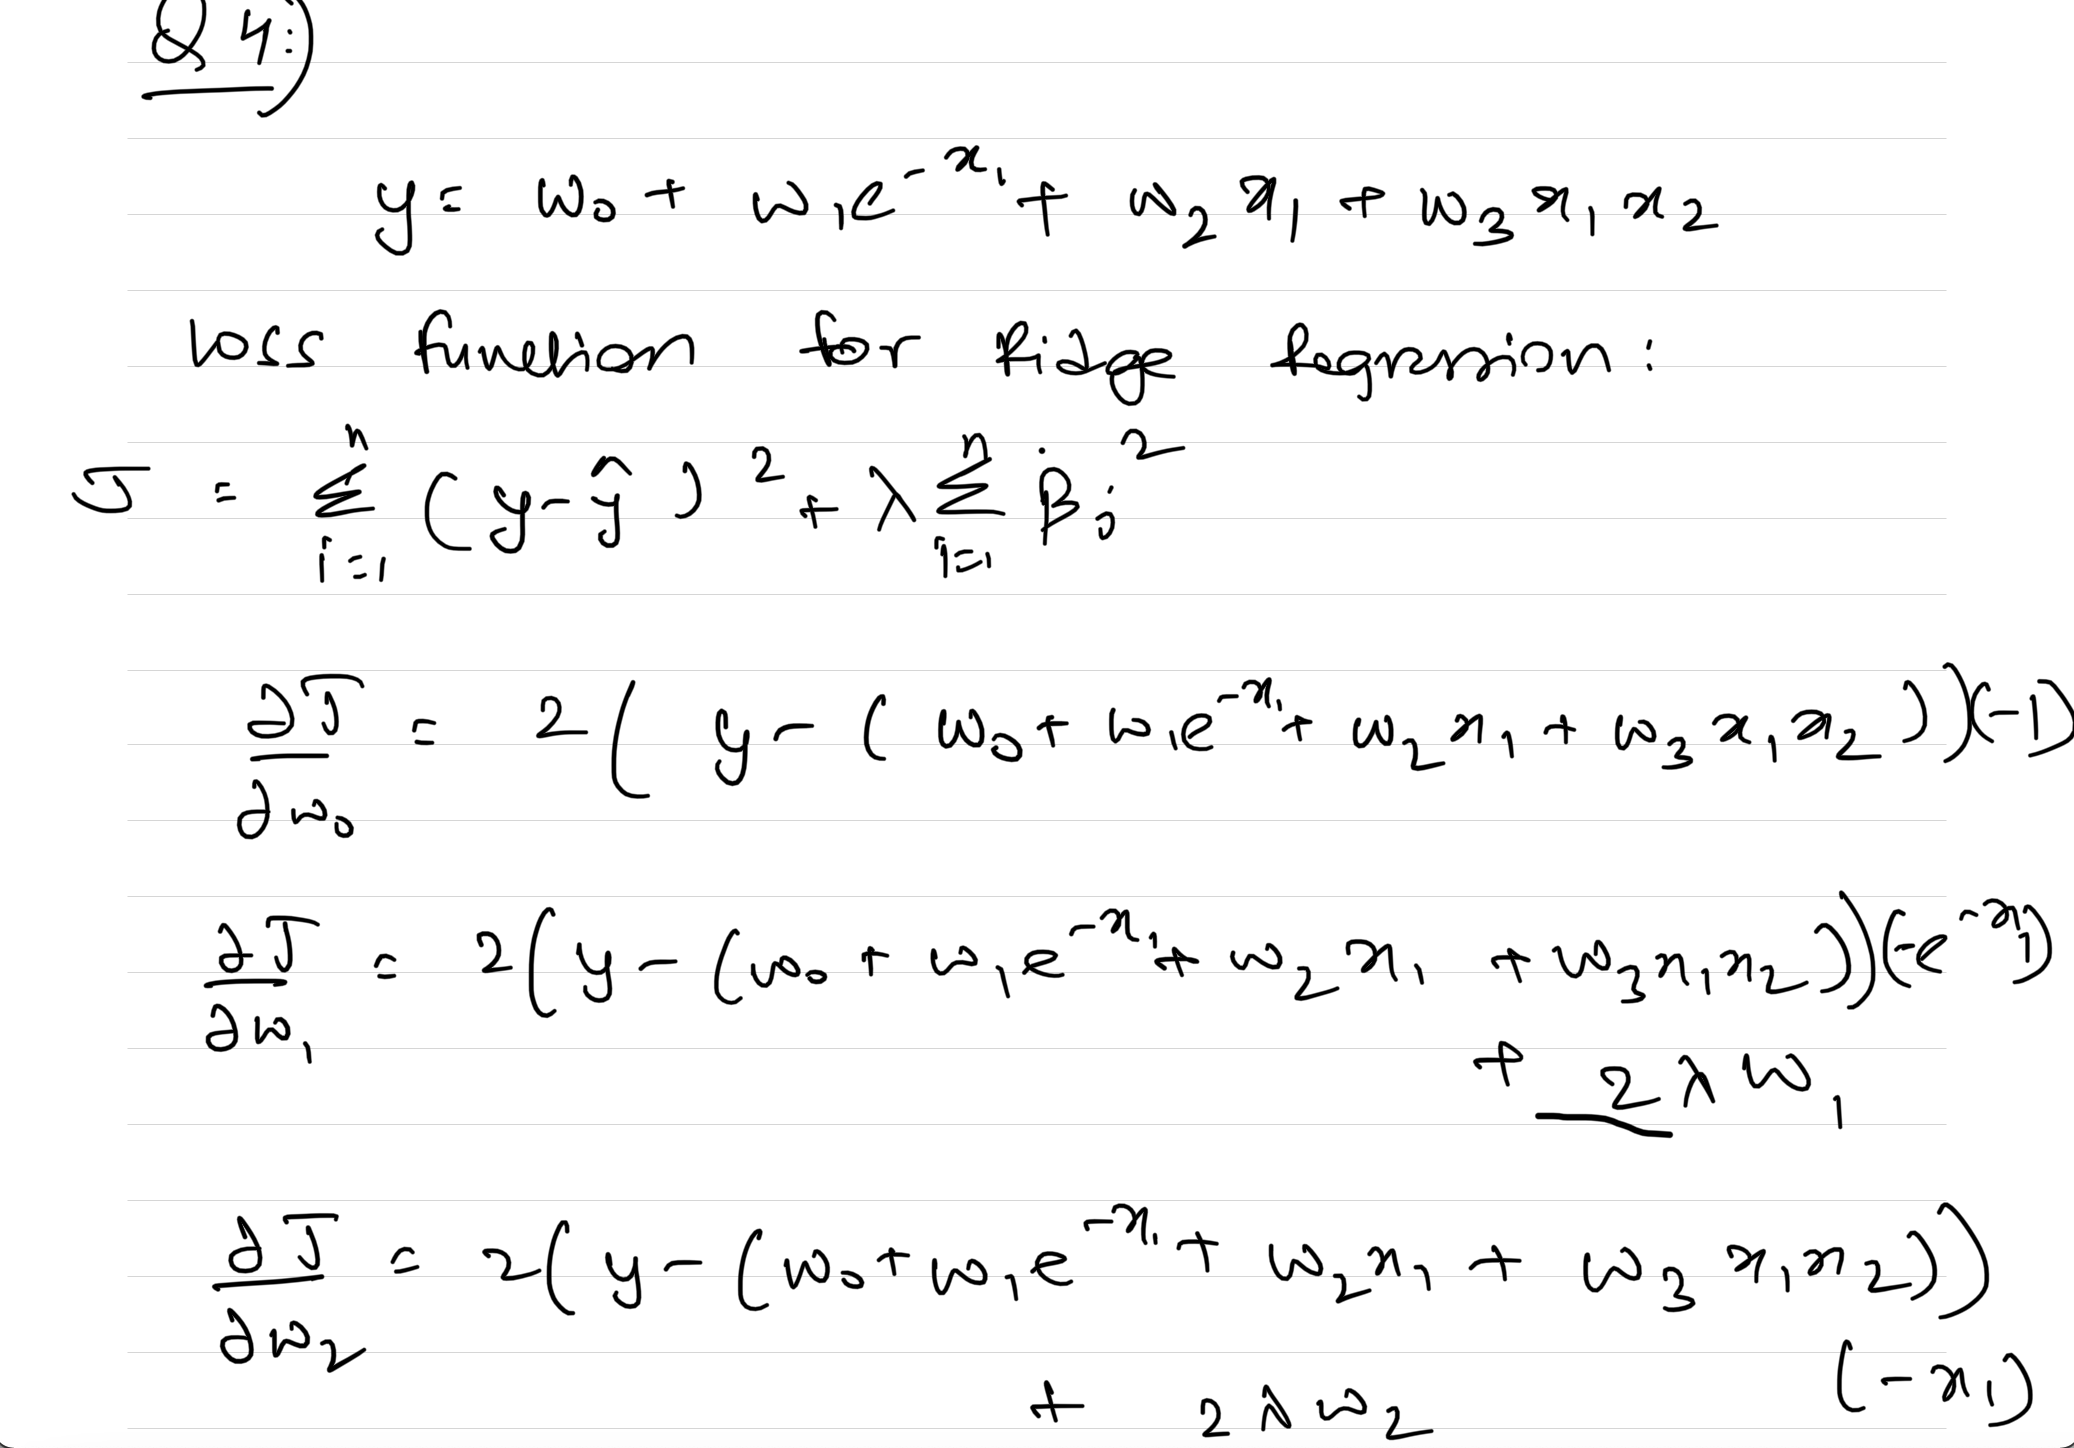

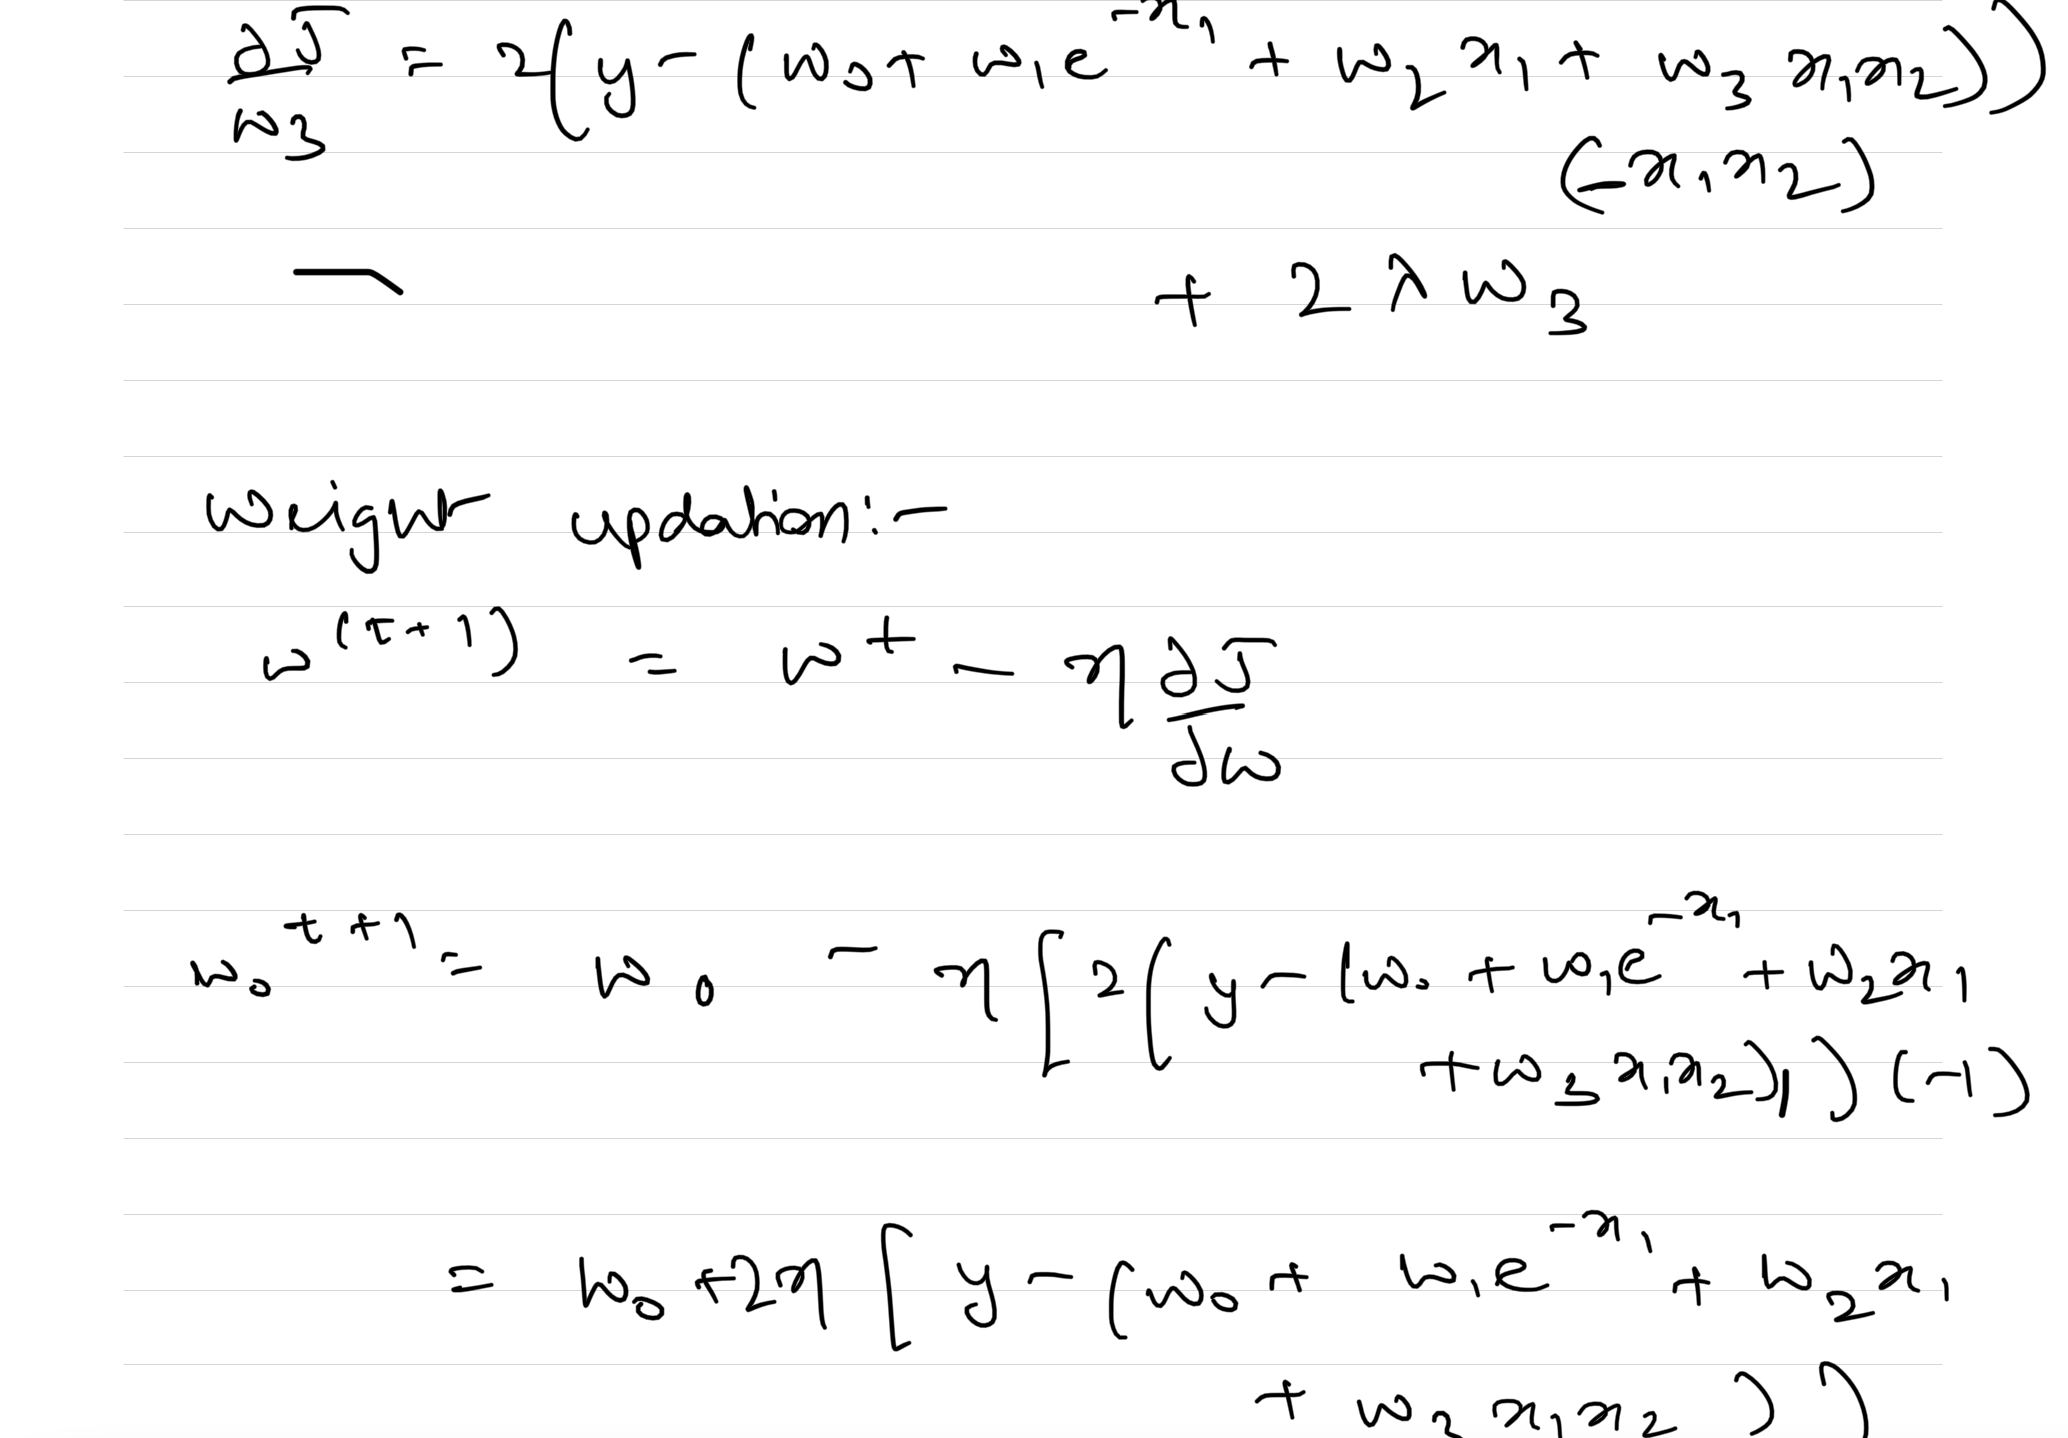

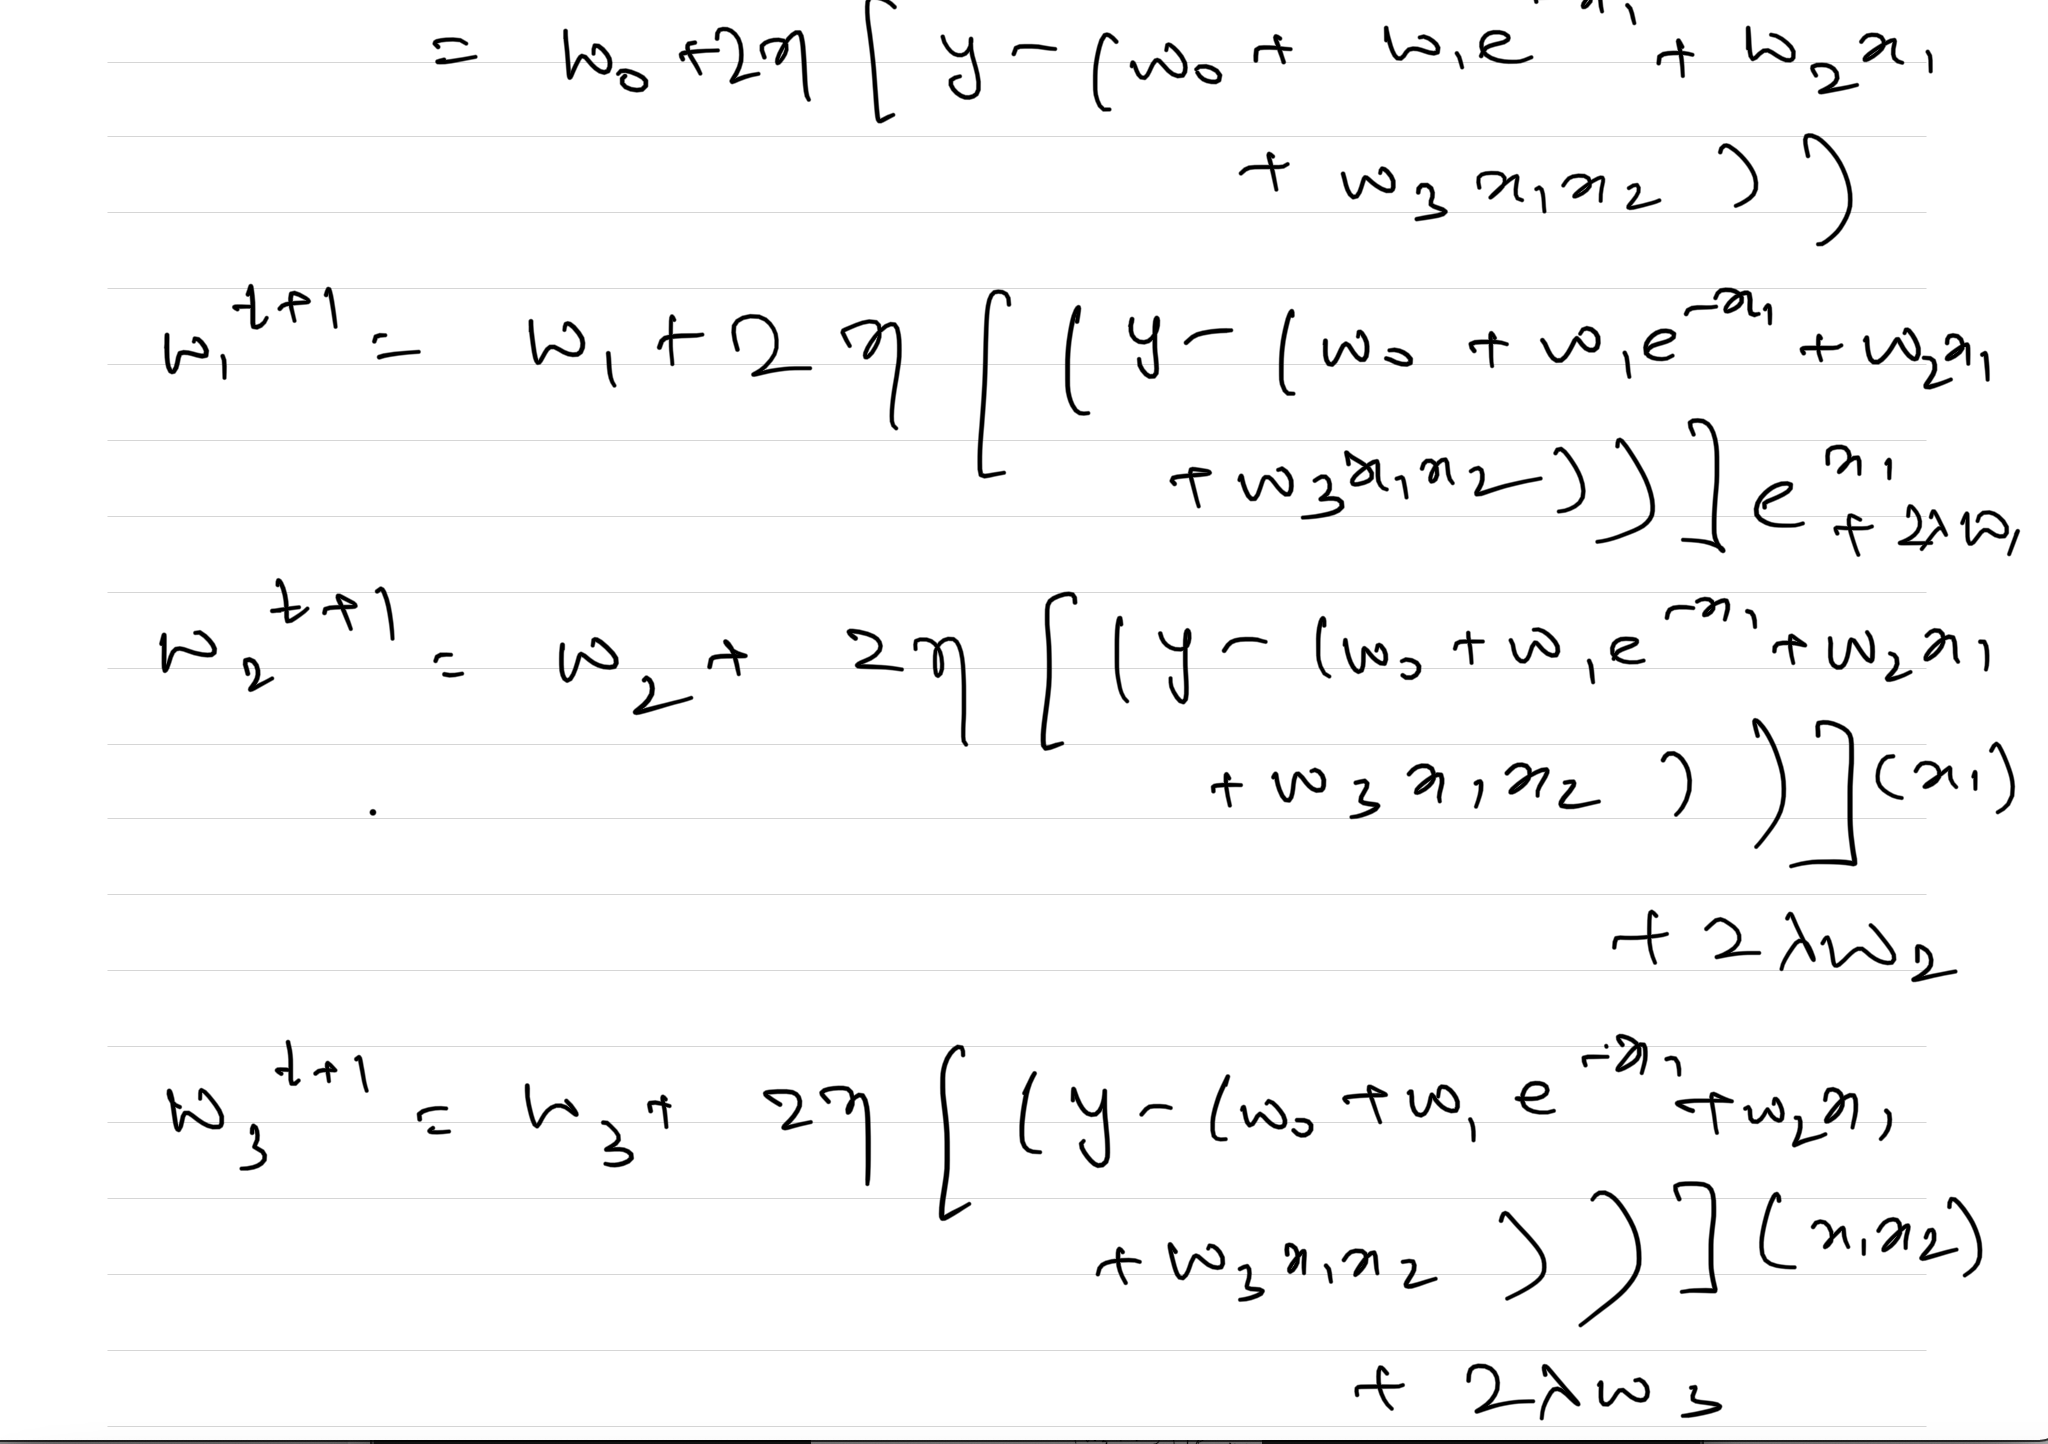